In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
from sklearn.cluster import DBSCAN
from sklearn import cluster
import astropy.coordinates as coord
from astropy import units as u

import sys, os
sys.path.append('C:\\Users\Quentin\\Documents\\ALMA_CHILI\\gaia-shock\\src')

## directory
rootdir = r'C:\Users\Quentin\Documents\ALMA_CHILI'
wdir    = r'%s\products'%(rootdir)
#notedir = r'%s\gaia-shock\notebooks_Quentin'%(rootdir)

os.chdir(wdir)  # to change the current directory

import gaia_utils_quentin as gu

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


## ------------------------------------------------------

In [6]:
cluster_file = open("BrowseTargets.18292.1530479692.gaia.selected.txt", "r")
Stop = False
line = cluster_file.readline()
i = 0
clusters = []
clusters_file = {}
while not Stop :
    i += 1
    line = cluster_file.readline()
    if line == "" : break
    Z = line.split('|')
    ncluster = int(Z[7])
    dist = int(Z[8])
    name = Z[1][:Z[1].find(" ",1+Z[1].find(" "))]
    
    if ncluster > 800 :
    #if name[:3] == "NGC" and dist < 500 : 
        clusters.append((name,ncluster,dist,float(Z[4])))
    
    clusters_file[name] = {}
    clusters_file[name]['num_cluster_stars'] = ncluster
    clusters_file[name]['distance'] = dist
    clusters_file[name]['log_age'] = float(Z[9])
    clusters_file[name]['cluster_radius'] = float(Z[4])
    
for c in clusters :
    print(c)
    
#with open('cluster_list', 'wb') as fichier:
#    my_pickler = pickle.Pickler(fichier)
#    my_pickler.dump(clusters_file)

('Sco OB4', 2868, 1082, 0.785)
('Platais 6', 847, 347, 1.3)
('NGC 2682', 907, 890, 1.03)
('NGC 2682', 907, 890, 1.03)
('Collinder 65', 1426, 325, 1.5)
('NGC 1746', 854, 800, 0.6)
('Per OB2', 4262, 400, 3.2)
('NGC 1912', 1229, 1144, 0.39)
('NGC 1582', 890, 1000, 0.41)
('ASCC 13', 1007, 800, 0.68)
('Cep OB3', 866, 668, 0.59)


In [2]:
voname_list = ["NGC2682-4.0deg-0.2err.vot", "NGC2516-6.0deg-0.2err.vot", "NGC6811-1.0deg-0.2err.vot",
               "NGC1647-4.0deg-0.2err.vot", "NGC1039-3.0deg-0.1err.vot", "NGC1912-2.0deg-0.2err.vot",
               ]
voname = voname_list[0]
voname = "NGC2516-6.0deg-0.01err.vot"

source = gu.source()
source.read_votable(voname)
source.convert_filter_data()
source.convert_to_cartesian()
source.normalization_normal()

## NGC2516-6.0deg-0.01err.vot read...
## Total stars: 11453
## Density star per pc^3: 0.00458

## Conversion on 11453 stars done...
## Stars selected: 11390

## Normalization done on filtered data..


In [ ]:
tab_source = []
for voname in voname_list :
    source = gu.source()
    source.read_votable(voname)
    source.convert_filter_data()
    source.convert_to_cartesian(centering=False)
    tab_source.append(source)

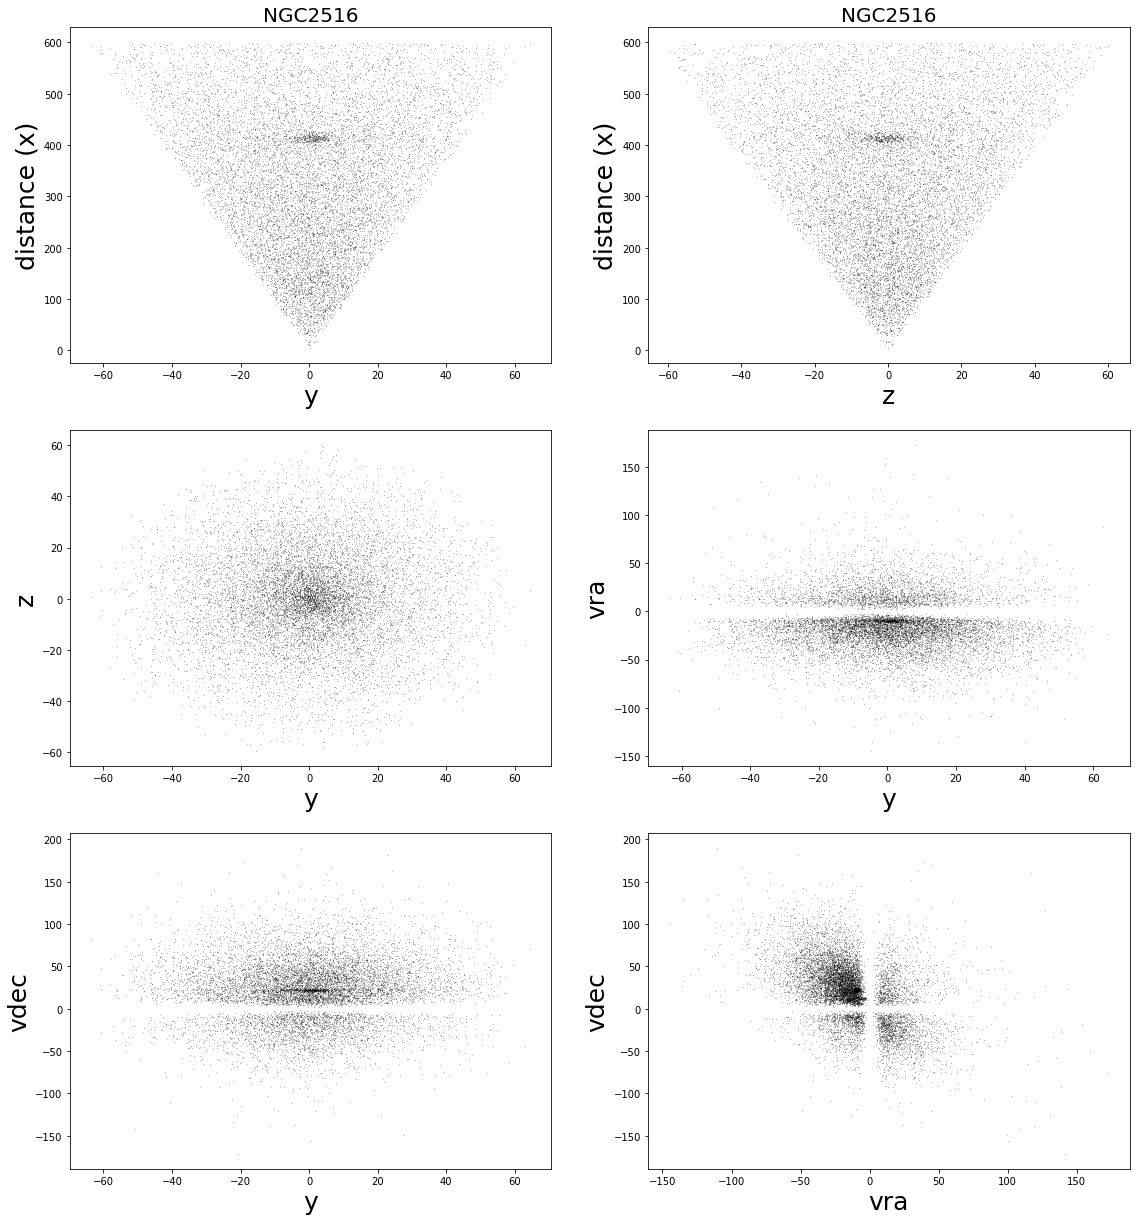

In [3]:
source.convert_to_cartesian()
source.plot_information(size=0.01,cartesian=True,HRD=False)

In [ ]:
source = tab_source[0]
radv = source.data['radial_velocity']
radv_err = source.data['radial_velocity_error']
print(type(radv))
print(len(radv))
print(radv.count())

print(type(radv_err))
print(len(radv_err))
print(radv_err.count())

radv = np.ma.filled(radv, -999999.)
radv_err = np.ma.filled(radv_err, -999999.)
i1 = np.where((radv >= -200) & (radv < -200))[0]

radv = radv[i1]
radv_err = radv_err[i1]

print(type(radv))
print(type(radv_err))
plt.plot(radv,radv_err)
plt.show()

In [ ]:
convert_filter_data(source)